Full Name: Mai Nhất Tùng

Student ID: 21520523

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

**Download file .csv**


In [1]:
!curl https://media.githubusercontent.com/media/mnt1702/M4CS/main/Assign_2/Data/fish.csv> fish.csv
!curl https://media.githubusercontent.com/media/mnt1702/M4CS/main/Assign_2/Data/insurance.csv > insurance.csv
!curl https://media.githubusercontent.com/media/mnt1702/M4CS/main/Assign_2/Data/tesla_stock.csv > tesla_stock.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  5483  100  5483    0     0  31488      0 --:--:-- --:--:-- --:--:-- 31877
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 55628  100 55628    0     0   204k      0 --:--:-- --:--:-- --:--:--  207k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  108k  100  108k    0     0   465k      0 --:

**Import lib**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as R2

**Model Regression with Gradient Descent and Normal Equation**

In [3]:
class LinearRegression_GD:
  def __init__ (self, eta = 0.001, max_iter = 20, random_state = 42):
    self.eta = eta
    self.max_iter = max_iter
    self.random_state = random_state
    self.w = None
    self.costs = []
  def predict(self, X):
    X_new = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
    return np.dot(X_new, self.w)
  def fit(self, X, y):
    X_new = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.1, size = 1 + X.shape[1])
    self.w[0] = 0
    self.costs = [ ]
    for n_iters in range (self.max_iter):
      y_pred = np.dot(X_new, self.w)
      diff = y - y_pred
      self.w += self.eta * np.dot(X_new.T, diff)/X_new.shape[0]
      cost = np.mean(diff ** 2) / 2
      self.costs.append(cost)

class LinearRegression_NE:
  def __init__(self):
    self.w = None
  def predict(self, X):
    X_new = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
    return np.dot(X_new, self.w)
  def fit(self, X, y):
    X_new = np.concatenate((np.ones((X.shape[0], 1)), X), axis = 1)
    self.w = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y

**Load data & Preprocessing**

In [4]:
data_fish = pd.read_csv('./fish.csv')
countNan = data_fish.isna().sum()
null_columns = countNan[countNan > 0]
null_columns

Series([], dtype: int64)

In [5]:
fish_X = data_fish.drop('Weight', axis= 1)
fish_y = data_fish['Weight']

In [6]:
eta = 0.1
max_iter = 200
random_state = 21520523

fish_X_train, fish_X_test, fish_y_train, fish_y_test = train_test_split(fish_X, fish_y, test_size = 0.3, random_state = random_state)

sc = StandardScaler()
fish_X_train = sc.fit_transform(fish_X_train)
fish_X_test = sc.transform(fish_X_test)

**Linear Regression with Gradient Descent**

In [7]:
LinearRegressionGD = LinearRegression_GD(eta = eta, max_iter = max_iter, random_state = random_state)
LinearRegressionGD.fit(fish_X_train, fish_y_train)
y_pred_GD = LinearRegressionGD.predict(fish_X_test)

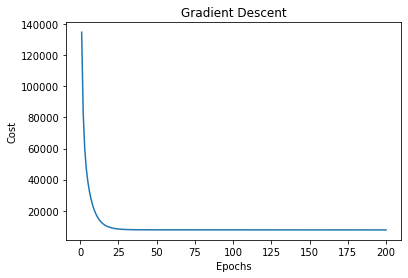

In [8]:
plt.plot(range(1, len(LinearRegressionGD.costs) + 1), LinearRegressionGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

**Linear Regression with Normal Equation**

In [9]:
LinearRegressionNE = LinearRegression_NE()
LinearRegressionNE.fit(fish_X_train, fish_y_train)
y_pred_NE = LinearRegressionNE.predict(fish_X_test)

**Compare**

In [10]:
print('Linear Regression with Gradient descent - R2 score',round(R2(fish_y_test, y_pred_GD), 6))
print('Linear Regression with Normal equation - R2 score',round(R2(fish_y_test, y_pred_NE), 6))

Linear Regression with Gradient descent - R2 score 0.855588
Linear Regression with Normal equation - R2 score 0.848199


# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

**Load data & Preprocessing**

In [11]:
data_insurance = pd.read_csv('./insurance.csv')
countNan = data_insurance.isna().sum()
null_columns = countNan[countNan > 0]
null_columns

Series([], dtype: int64)

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_insurance['sex'] = label_encoder.fit_transform(data_insurance['sex'])
data_insurance['smoker'] = label_encoder.fit_transform(data_insurance['smoker'])

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

region = encoder.fit_transform(np.array(data_insurance['region']).reshape(-1,1))
new = pd.DataFrame(region, columns = encoder.get_feature_names(['region']) )
data_insurance = pd.concat([data_insurance.drop('region', axis = 1), new], axis=1)

c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
insurance_X = data_insurance.drop('charges', axis = 1)
insurance_y = data_insurance['charges']

In [15]:
eta = 0.1
max_iter = 200
random_state = 21520523

insurance_X_train, insurance_X_test, insurance_y_train, insurance_y_test = train_test_split(insurance_X, insurance_y, test_size = 0.3, random_state = random_state)

sc = StandardScaler()
insurance_X_train = sc.fit_transform(insurance_X_train)
insurance_X_test = sc.fit_transform(insurance_X_test)

**Linear regression with Gradient descent**

In [16]:
LinearRegressionGD = LinearRegression_GD(eta = eta, max_iter = max_iter, random_state = random_state)
LinearRegressionGD.fit(insurance_X_train, insurance_y_train)
y_pred_GD = LinearRegressionGD.predict(insurance_X_test)

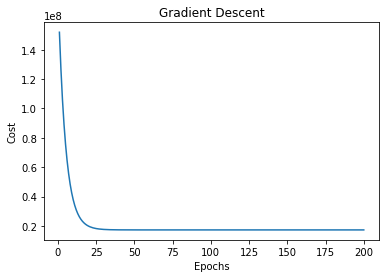

In [17]:
plt.plot(range(1, len(LinearRegressionGD.costs) + 1), LinearRegressionGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

**Linear regression with Normal Equation**

In [18]:
LinearRegressionNE = LinearRegression_NE()
LinearRegressionNE.fit(insurance_X_train, insurance_y_train)
y_pred_NE = LinearRegressionNE.predict(insurance_X_test)

**Compare**

In [19]:
print('Linear Regression with Gradient descent - R2 score',round(R2(insurance_y_test, y_pred_GD), 6))
print('Linear Regression with Normal equation - R2 score',round(R2(insurance_y_test, y_pred_NE), 6))

Linear Regression with Gradient descent - R2 score 0.739156
Linear Regression with Normal equation - R2 score 0.739761


# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

**Load data & Preprocessing**

In [20]:
data_tesla = pd.read_csv('./tesla_stock.csv')
countNan = data_tesla.isna().sum()
null_columns = countNan[countNan > 0]
null_columns

Series([], dtype: int64)

In [21]:
tesla_X = data_tesla.drop(['Close'], axis = 1)
tesla_y = data_tesla['Close']

In [22]:
eta = 0.1
max_iter = 200
random_state = 21520523

tesla_X_train, tesla_X_test, tesla_y_train, tesla_y_test = train_test_split(tesla_X, tesla_y, test_size = 0.3, random_state = random_state)

sc = StandardScaler()
tesla_X_train = sc.fit_transform(tesla_X_train)
tesla_X_test = sc.fit_transform(tesla_X_test)

**Linear regression with Gradient Descent**

In [23]:
LinearRegressionGD = LinearRegression_GD(eta = eta, max_iter = max_iter, random_state = random_state)
LinearRegressionGD.fit(tesla_X_train, tesla_y_train)
y_pred_GD = LinearRegressionGD.predict(tesla_X_test)

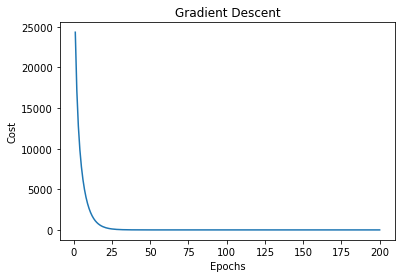

In [24]:
plt.plot(range(1, len(LinearRegressionGD.costs)+1), LinearRegressionGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

**Linear regression with Normal Equation**

In [25]:
LinearRegressionNE = LinearRegression_NE()
LinearRegressionNE.fit(tesla_X_train, tesla_y_train)
y_pred_NE = LinearRegressionNE.predict(tesla_X_test)

**Compare**

In [26]:
print('Linear Regression with Gradient descent - R2 score',round(R2(tesla_y_test, y_pred_GD), 6))
print('Linear Regression with Normal equation - R2 score',round(R2(tesla_y_test, y_pred_NE), 6))

Linear Regression with Gradient descent - R2 score 0.997184
Linear Regression with Normal equation - R2 score 0.998309
